<a href="https://colab.research.google.com/github/Yang-Hyun-Jun/Machine-Learning-2022/blob/master/assignment_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data  = 'assignment_12_data.txt'
feature0    = np.genfromtxt(fname_data, delimiter=',')

number_data     = np.size(feature0, 0)
number_feature  = np.size(feature0, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 50
number of feature : 2


## plot the input data

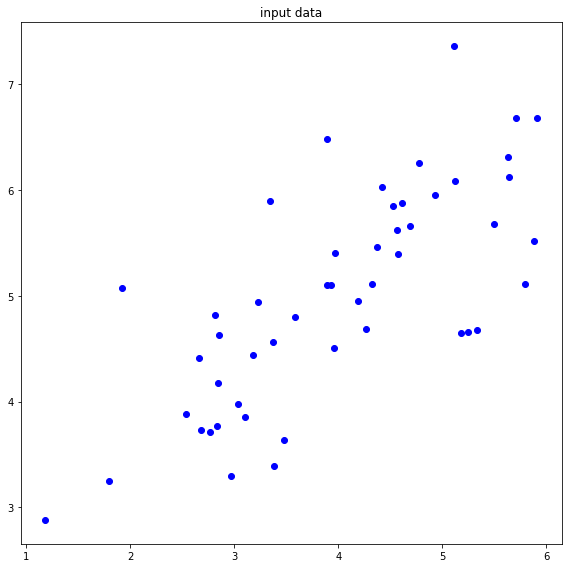

In [3]:
plt.figure(figsize=(8,8))   
plt.title('input data')

x0 = feature0[:,0]
y0 = feature0[:,1]

plt.scatter(x0, y0, color='blue')

plt.tight_layout()
plt.show()

## Normalization (Z-scoring)
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [4]:
def normalize(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    feature_normalize = feature.copy()

    x_mu = np.mean(feature[:,0])
    x_std = np.std(feature[:,0])
    y_mu = np.mean(feature[:,1])
    y_std = np.std(feature[:,1])

    feature_normalize[:,0] = (feature[:,0]-x_mu)/x_std
    feature_normalize[:,1] = (feature[:,1]-y_mu)/y_std

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return feature_normalize

In [95]:
feature = normalize(feature0)

x   = feature[:, 0]
y   = feature[:, 1]

min_x = np.min(x)
min_y = np.min(y)

max_x = np.max(x)
max_y = np.max(y)

## compute covariance matrix
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features

In [6]:
def compute_covariance(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    n = feature.shape[0]
    Sigma = np.matmul(feature.T, feature)
    Sigma = 1/n * Sigma

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return Sigma

## compute principal components
- `np.linalg.eig`
- `argsort()`
- return the eigenvalues and the eigenvectors in a decreasing order according to the eigenvalues

In [7]:
def compute_principal_component(feature):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    Sigma = compute_covariance(feature)
    eigenvalues, eigenvectors = np.linalg.eig(Sigma)
    idx = np.argsort(eigenvalues)[::-1]

    first_value = eigenvalues[idx[0]]
    first_vector = eigenvectors[:,idx[0]]

    second_value = eigenvalues[idx[1]]
    second_vector = eigenvectors[:,idx[1]]

    principal_component_1 = first_value * first_vector
    principal_component_2 = second_value * second_vector

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
     
    return (principal_component_1, principal_component_2)

In [8]:
(principal_component_1, principal_component_2) = compute_principal_component(feature)
principal_component_1

array([1.22720503, 1.22720503])

## compute the projection of point onto the axis
- `np.matmul`
- `np.dot`
- shape of feature = $n \times m$ where $n$ is the number of data and $m$ is the dimension of features
- shape of vector = $m \times 1$ where $m$ is the dimension of features

In [43]:
def compute_projection_onto_line(feature, vector):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    vector_norm = np.linalg.norm(vector, ord=2)
    vector_ = np.tile(vector, (feature.shape[0], 1))

    length = np.dot(feature, vector) / vector_norm
    length_ = np.concatenate([length.reshape(-1,1), length.reshape(-1,1)], axis=1)
    projection = (length_ * vector_) * (1/vector_norm)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return projection

## compute the principal components and the projection of feature

In [44]:
(principal_component_1, principal_component_2) = compute_principal_component(feature)

projection1 = compute_projection_onto_line(feature, principal_component_1)
projection2 = compute_projection_onto_line(feature, principal_component_2)

---

## functions for presenting the results

---

---

In [46]:
def function_result_01():
   
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')
    plt.scatter(x, y, color='blue')

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [82]:
def function_result_02():

    plt.figure(figsize=(8,8))
    plt.title('principal components')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    vec = principal_component_1
    vec2 = principal_component_2    

    V = np.array([[vec[0], vec[1]], [vec2[0], vec2[1]]])
    origin = np.array([[0, 0],[0, 0]]) # origin point

    plt.quiver(*origin, V[:,0], V[:,1], color=['r','g'], scale=3)
    plt.scatter(x, y, color='blue')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [96]:
def function_result_03():

    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    vec = principal_component_1
    x1 = np.array([0, vec[0]])
    y1 = np.array([0, vec[1]])

    w, b = np.polyfit(x1, y1, 1)
    x_ = np.arange(-5,5)
    plt.plot(np.arange(-5, 5), w * x_ + b, color="r")
    plt.scatter(x, y, color='blue')

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [98]:
def function_result_04():

    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    vec = principal_component_2
    x1 = np.array([0, vec[0]])
    y1 = np.array([0, vec[1]])

    w, b = np.polyfit(x1, y1, 1)
    x_ = np.arange(-5,5)
    plt.plot(np.arange(-5, 5), w * x_ + b, color="r")
    plt.scatter(x, y, color='blue')


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [103]:
def function_result_05():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    vec = principal_component_1
    x1 = np.array([0, vec[0]])
    y1 = np.array([0, vec[1]])

    w, b = np.polyfit(x1, y1, 1)
    x_ = np.arange(-5,5)
    plt.plot(np.arange(-5, 5), w * x_ + b, color="r")
    plt.scatter(x, y, color='blue')
    plt.scatter(projection1[:,0], projection1[:,1], color="green")


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()


In [106]:
def function_result_06():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    vec = principal_component_2
    x1 = np.array([0, vec[0]])
    y1 = np.array([0, vec[1]])

    w, b = np.polyfit(x1, y1, 1)
    x_ = np.arange(-5,5)
    plt.plot(np.arange(-5, 5), w * x_ + b, color="r")
    plt.scatter(x, y, color='blue')
    plt.scatter(projection2[:,0], projection2[:,1], color="green")


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [116]:
def function_result_07():

    plt.figure(figsize=(8,8))
    plt.title('projection onto the first principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    vec = principal_component_1
    x1 = np.array([0, vec[0]])
    y1 = np.array([0, vec[1]])

    w, b = np.polyfit(x1, y1, 1)
    x_ = np.arange(-5,5)
    plt.plot(np.arange(-5, 5), w * x_ + b, color="r")
    plt.scatter(projection1[:,0], projection1[:,1], color="green")
    plt.scatter(x, y, color='blue')
    
    for i in range(x.shape[0]):
      plt.plot([x[i], projection1[i,0]], [y[i], projection1[i,1]], color="grey")

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

In [118]:
def function_result_08():

    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    vec = principal_component_2
    x1 = np.array([0, vec[0]])
    y1 = np.array([0, vec[1]])

    w, b = np.polyfit(x1, y1, 1)
    x_ = np.arange(-5,5)
    plt.plot(np.arange(-5, 5), w * x_ + b, color="r")
    plt.scatter(projection2[:,0], projection2[:,1], color="green")
    plt.scatter(x, y, color='blue')
    
    for i in range(x.shape[0]):
      plt.plot([x[i], projection2[i,0]], [y[i], projection2[i,1]], color="grey")


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    plt.xlim(min_x - 0.5, max_x + 0.5)
    plt.ylim(min_y - 0.5, max_y + 0.5)

    plt.tight_layout()
    plt.show()

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************


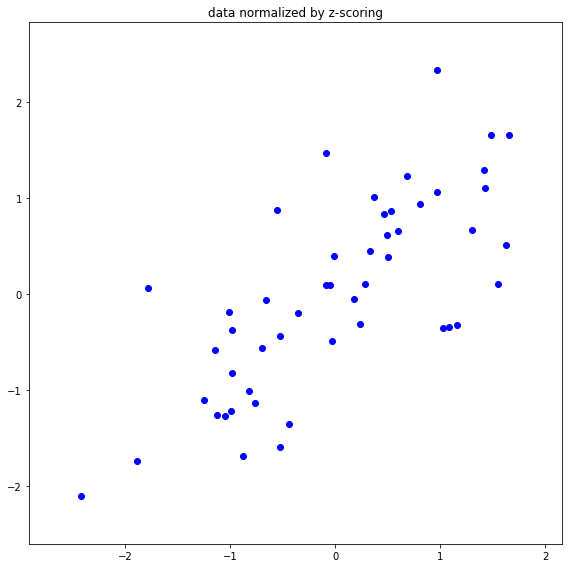

**************************************************
## [RESULT 02]
**************************************************


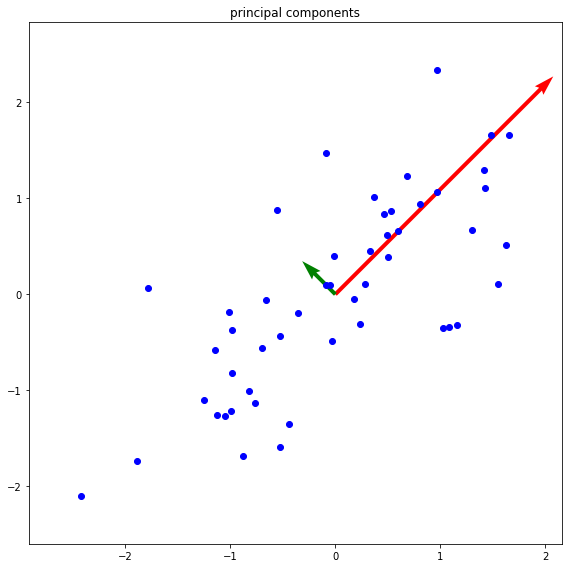

**************************************************
## [RESULT 03]
**************************************************


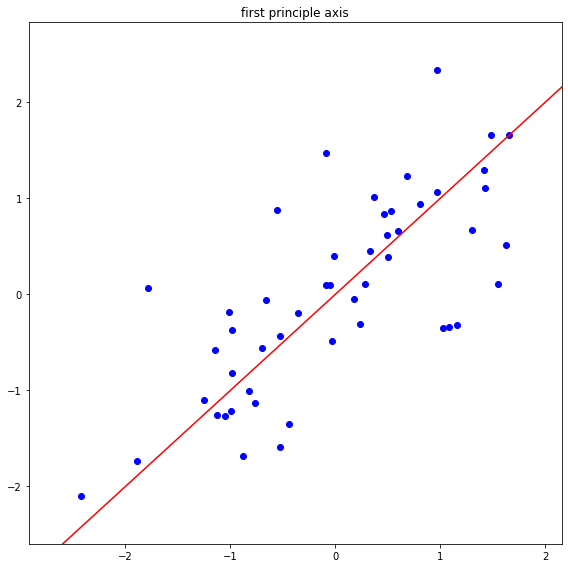

**************************************************
## [RESULT 04]
**************************************************


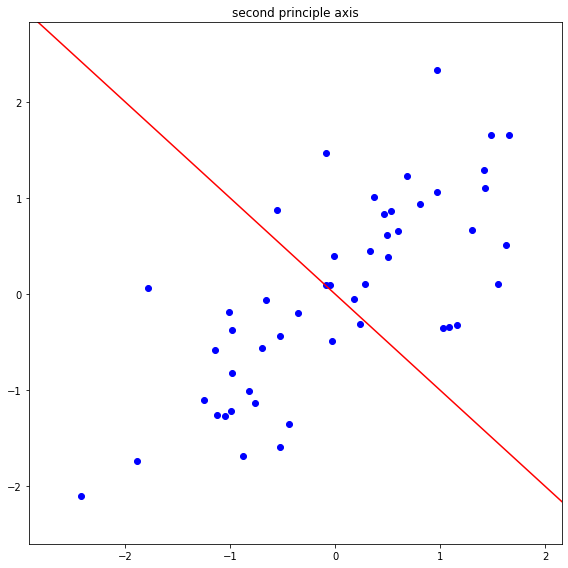

**************************************************
## [RESULT 05]
**************************************************


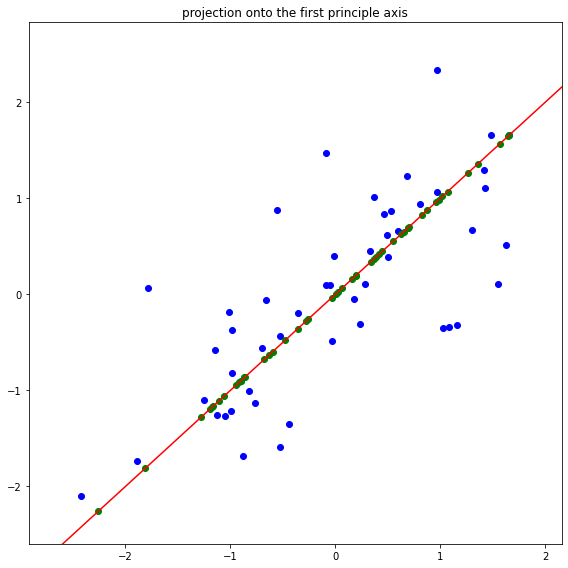

**************************************************
## [RESULT 06]
**************************************************


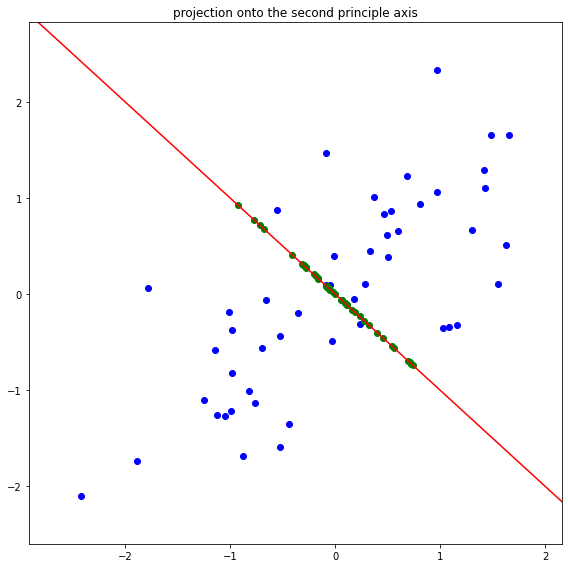

**************************************************
## [RESULT 07]
**************************************************


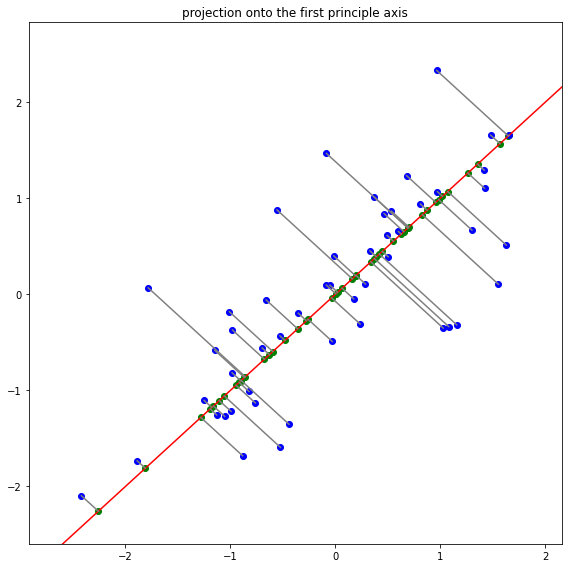

**************************************************
## [RESULT 08]
**************************************************


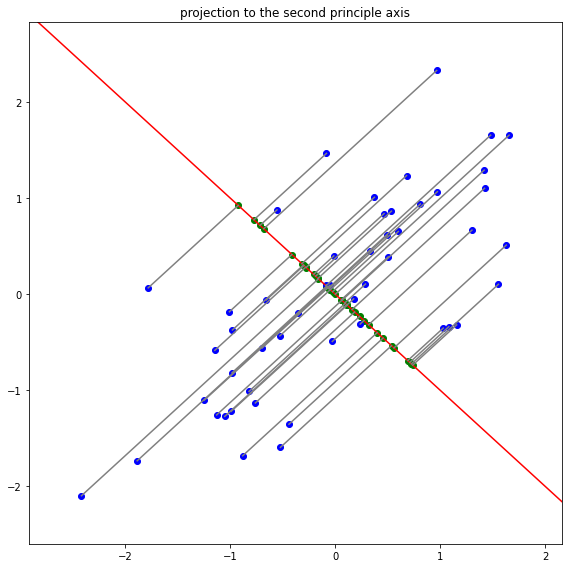

In [119]:
number_result = 8

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)